# An end to end workflow

In [10]:
import numpy as np

In [11]:
# Getting Data Ready
import pandas as pd
heart_disease = pd.read_csv("heart-disease1.csv")
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [12]:
# Create X feature matrix
X = heart_disease.drop("target",axis = 1)

# Create labels
y = heart_disease["target"]

In [13]:
# Choose the right models and hyperparameters
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
# If we want we can give n_estimators hear it takes 100 by default
# Keeping defult hyperparameters
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [14]:
# Fit the model to the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [15]:
clf.fit(X_train,y_train);

In [16]:
# Make a prediction
y_label = clf.predict(np.array([0,1,2,3,4]))
# This error is intessionally left to remind that dimensions should be same

ValueError: Expected 2D array, got 1D array instead:
array=[0. 1. 2. 3. 4.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [17]:
y_preds = clf.predict(X_test)
y_preds

array([1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0])

In [18]:
y_test

132    1
34     1
4      1
126    1
35     1
      ..
219    0
232    0
257    0
284    0
201    0
Name: target, Length: 61, dtype: int64

In [19]:
# Evaluate the model
clf.score(X_train,y_train)

1.0

In [20]:
clf.score(X_test,y_test)

0.819672131147541

In [21]:
Y_train

NameError: name 'Y_train' is not defined

In [22]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.83      0.81      0.82        31
           1       0.81      0.83      0.82        30

    accuracy                           0.82        61
   macro avg       0.82      0.82      0.82        61
weighted avg       0.82      0.82      0.82        61



In [23]:
confusion_matrix(y_test, y_preds)

array([[25,  6],
       [ 5, 25]])

In [24]:
accuracy_score(y_test, y_preds)

0.819672131147541

In [25]:
# Improving our Model
np.random.seed(42)
for i in range(10,100,10):
    print(f"Trying model with {i} estimators ...")
    clf = RandomForestClassifier(n_estimators=i).fit(X_train,y_train)
    print(f"Model accuracy on test set : {clf.score(X_test, y_test)*100:.2f}%")
    print(" ")

Trying model with 10 estimators ...
Model accuracy on test set : 81.97%
 
Trying model with 20 estimators ...
Model accuracy on test set : 81.97%
 
Trying model with 30 estimators ...
Model accuracy on test set : 83.61%
 
Trying model with 40 estimators ...
Model accuracy on test set : 81.97%
 
Trying model with 50 estimators ...
Model accuracy on test set : 81.97%
 
Trying model with 60 estimators ...
Model accuracy on test set : 77.05%
 
Trying model with 70 estimators ...
Model accuracy on test set : 83.61%
 
Trying model with 80 estimators ...
Model accuracy on test set : 81.97%
 
Trying model with 90 estimators ...
Model accuracy on test set : 85.25%
 


In [26]:
import pickle

pickle.dump(clf , open("random-forest-model-1.pkl", "wb"))

In [27]:
# Loding saved model
loaded_model = pickle.load(open("random-forest-model-1.pkl", "rb"))
loaded_model.score(X_test,y_test)

0.8524590163934426

# GETTING DATA READY IN DETAILS

1)split the data into fearures and label (x,y)

2)filling missing values

3)converting non numerical values to numerical values 

In [29]:
car_sales = pd.read_csv("car-sales.csv")
car_sales


,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,"$4,000.00"
1,Honda,Red,87899,4,"$5,000.00"
2,Toyota,Blue,32549,3,"$7,000.00"
3,BMW,Black,11179,5,"$22,000.00"
4,Nissan,White,213095,4,"$3,500.00"
5,Toyota,Green,99213,4,"$4,500.00"
6,Honda,Blue,45698,4,"$7,500.00"
7,Honda,Blue,54738,4,"$7,000.00"
8,Toyota,White,60000,4,"$6,250.00"
9,Nissan,White,31600,4,"$9,700.00"


In [33]:
# Create X feature matrix
X = heart_disease.drop("target",axis = 1)
X.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [35]:
# Create labels
y = heart_disease["target"]
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [36]:
#Splitting the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [38]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((242, 13), (61, 13), (242,), (61,))

# MAke sure it is all numerical

In [40]:
car_sales = pd.read_csv("data/car-sales-extended.csv")
car_sales

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043
...,...,...,...,...,...
995,Toyota,Black,35820,4,32042
996,Nissan,White,155144,3,5716
997,Nissan,Blue,66604,4,31570
998,Honda,White,215883,4,4001


In [41]:
len(car_sales)

1000

In [43]:
car_sales.dtypes

Make             object
Colour           object
Odometer (KM)     int64
Doors             int64
Price             int64
dtype: object

In [44]:
X = car_sales.drop("Price",axis = 1)
y = car_sales["Price"]

# Splliting the data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((800, 4), (200, 4), (800,), (200,))

In [46]:
# Building model
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(X_train,y_train)
model.score(X_test,y_test)
# The error is because table does not have numbers so convert it into numbers

ValueError: could not convert string to float: 'Toyota'

In [49]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
categorical_features = ["Make","Colour","Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",
                                 one_hot,
                                 categorical_features)],
                                remainder = "passthrough")
transformed_X = transformer.fit_transform(X)
transformed_X

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 3.54310e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+00, 1.92714e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 8.47140e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 6.66040e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.15883e+05],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.48360e+05]])

In [50]:
pd.DataFrame(transformed_X)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,35431.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,84714.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,154365.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,35820.0
996,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,155144.0
997,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,66604.0
998,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,215883.0


In [54]:
# This is optional if u dont want above process
dummies = pd.get_dummies(car_sales[["Make","Colour","Doors"]])
dummies

,Doors,Make_BMW,Make_Honda,Make_Nissan,Make_Toyota,Colour_Black,Colour_Blue,Colour_Green,Colour_Red,Colour_White
0,4,0,1,0,0,0,0,0,0,1
1,5,1,0,0,0,0,1,0,0,0
2,4,0,1,0,0,0,0,0,0,1
3,4,0,0,0,1,0,0,0,0,1
4,3,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
995,4,0,0,0,1,1,0,0,0,0
996,3,0,0,1,0,0,0,0,0,1
997,4,0,0,1,0,0,1,0,0,0
998,4,0,1,0,0,0,0,0,0,1


In [55]:
# Building model again with numberical values 
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(transformed_X, y, test_size = 0.2)
model.fit(X_train,y_train)

RandomForestRegressor()

In [56]:
model.score(X_test,y_test)

0.3235867221569877

# What if there were missing values
1. Fill them with some values
2. Remove the samples with missing values altogether

In [59]:
# import data
car_sales_missing = pd.read_csv("data/car-sales-extended-missing-data.csv")
car_sales_missing.head(10)

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
5,Honda,Red,42652.0,4.0,23883.0
6,Toyota,Blue,163453.0,4.0,8473.0
7,Honda,White,NaN,4.0,20306.0
8,NaN,White,130538.0,4.0,9374.0
9,Honda,Blue,51029.0,4.0,26683.0


In [61]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [63]:
X = car_sales_missing.drop("Price",axis = 1)
y = car_sales_missing["Price"]

In [65]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
categorical_features = ["Make","Colour","Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",
                                 one_hot,
                                 categorical_features)],
                                remainder = "passthrough")
transformed_X = transformer.fit_transform(X)
transformed_X

# This is because our data has the NaN values so now we have to remove or manipulate it

ValueError: Input contains NaN

### fill missing data with pandas

In [66]:
car_sales_missing["Make"].fillna("missing", inplace = True)

car_sales_missing["Colour"].fillna("missing", inplace = True)

car_sales_missing["Odometer (KM)"].fillna(car_sales_missing["Odometer (KM)"].mean(), inplace = True)

car_sales_missing["Doors"].fillna(4, inplace = True)

In [68]:
car_sales_missing.isna().sum()

Make              0
Colour            0
Odometer (KM)     0
Doors             0
Price            50
dtype: int64

In [69]:
#For price we will remove rows missing values

car_sales_missing.dropna(inplace=True)

In [70]:
car_sales_missing.isna().sum()

Make             0
Colour           0
Odometer (KM)    0
Doors            0
Price            0
dtype: int64

In [71]:
X = car_sales.drop("Price",axis = 1)
y = car_sales["Price"]

In [72]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
categorical_features = ["Make","Colour","Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",
                                 one_hot,
                                 categorical_features)],
                                remainder = "passthrough")
transformed_X = transformer.fit_transform(car_sales_missing)
transformed_X

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        3.54310e+04, 1.53230e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        1.92714e+05, 1.99430e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        8.47140e+04, 2.83430e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 0.00000e+00,
        6.66040e+04, 3.15700e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.15883e+05, 4.00100e+03],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.48360e+05, 1.27320e+04]])

In [73]:
# Option 2 Fill missing values with Scikit-Learn 

In [76]:
car_sales_missing = pd.read_csv("data/car-sales-extended-missing-data.csv")
car_sales_missing

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [78]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [79]:
#For price we will remove rows missing values

car_sales_missing.dropna(subset = ["Price"],inplace=True)
car_sales_missing.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

In [80]:
# Split X and y
X = car_sales_missing.drop("Price",axis = 1)
y = car_sales_missing["Price"]

In [85]:
# Fill missing values with sciket Learn
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

# Fill categorical values with missing and numerical with mean
cat_imputer = SimpleImputer(strategy="constant", fill_value="missing")
door_imputer = SimpleImputer(strategy="constant",fill_value=4)
num_imputer = SimpleImputer(strategy="mean")

# Define Coloumns
cat_features = ["Make","Colour"]
door_feature = ["Doors"]
num_feature = ["Odometer (KM)"]

# Create an imputer that fills missing valuess
imputer = ColumnTransformer([
    ("cat_imputer", cat_imputer, cat_features),
    ("door_imputer", door_imputer,door_feature),
    ("num_imputer",num_imputer,num_feature)
])

# Transform Data
filled_X = imputer.fit_transform(X)
filled_X

array([['Honda', 'White', 4.0, 35431.0],
       ['BMW', 'Blue', 5.0, 192714.0],
       ['Honda', 'White', 4.0, 84714.0],
       ...,
       ['Nissan', 'Blue', 4.0, 66604.0],
       ['Honda', 'White', 4.0, 215883.0],
       ['Toyota', 'Blue', 4.0, 248360.0]], dtype=object)

In [86]:
car_sales_filled = pd.DataFrame(filled_X, 
                                columns=["Make","Colour","Doors","Odometer (KM)"])

In [87]:
car_sales_filled

,Make,Colour,Doors,Odometer (KM)
0,Honda,White,4,35431
1,BMW,Blue,5,192714
2,Honda,White,4,84714
3,Toyota,White,4,154365
4,Nissan,Blue,3,181577
...,...,...,...,...
945,Toyota,Black,4,35820
946,missing,White,3,155144
947,Nissan,Blue,4,66604
948,Honda,White,4,215883


In [88]:
car_sales_filled.isna().sum()

Make             0
Colour           0
Doors            0
Odometer (KM)    0
dtype: int64

In [89]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
categorical_features = ["Make","Colour","Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",
                                 one_hot,
                                 categorical_features)],
                                remainder = "passthrough")
transformed_X = transformer.fit_transform(car_sales_filled)
transformed_X

<950x15 sparse matrix of type '<class 'numpy.float64'>'
	with 3800 stored elements in Compressed Sparse Row format>

In [101]:
# Now we have data got filled with all values 
#  Lets fit our values
np.random.seed(42)
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(transformed_X, y, test_size = 0.2)
model = RandomForestRegressor()
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.21793683294791932

# Choosing the right estimators an algorithm for our problem
    sklearn uses estimators as another term for machine learning algorithm
        * Classification
        * Regression
    Step 1:-Check the sciket-learn machine learning model map

In [102]:
# Picking a machine learning model for our regression problem
from sklearn.datasets import load_boston
boston = load_boston()
boston

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [104]:
boston_df = pd.DataFrame(boston["data"], columns=boston["feature_names"])
boston_df["target"] = pd.Series(boston["target"])
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [106]:
# How many samples do we have
len(boston_df)

506

In [108]:
# Lets try the Rigid Regression Model
from sklearn.linear_model import Ridge

# Set up random seed
np.random.seed(42)

# Create the data
X = boston_df.drop("target",axis = 1)
y = boston_df["target"]

X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.2)

model = Ridge()
model.fit(X_train,y_train)

# Checking score
model.score(X_test,y_test)

0.6662221670168519

In [110]:
# Now we will try Random Forest

from sklearn.ensemble import RandomForestRegressor
np.random.seed(42)

X = boston_df.drop("target",axis = 1)
y = boston_df["target"]

X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.2)

rf = RandomForestRegressor()
rf.fit(X_train,y_train)

#Evaluting
rf.score(X_test,y_test)

0.8654448653350507

## Choosing the right estimators by going to map https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

In [111]:
heart_disease = pd.read_csv("data/heart-disease.csv")
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [112]:
len(heart_disease)

303

### Counsilting the map it says try `linear Svc`

In [124]:
# Import the model
from sklearn.svm import LinearSVC

np.random.seed(42)
# Making data ready
X = heart_disease.drop("target",axis = 1)
y = heart_disease["target"]

X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.2)

clf = LinearSVC()
clf.fit(X_train,y_train)
clf.score(X_test,y_test)

/Users/somyajaiswal/Desktop/Machine_Learning/Test/env/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


0.8688524590163934

In [126]:
# Import the model
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)
# Making data ready
X = heart_disease.drop("target",axis = 1)
y = heart_disease["target"]

X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.2)

clf = RandomForestClassifier()
clf.fit(X_train,y_train)
clf.score(X_test,y_test)

0.8524590163934426

# 3 Fitting the model to the data

In [143]:
# Import the model
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)
# Making data ready
X = heart_disease.drop("target",axis = 1)
y = heart_disease["target"]

X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.2)

clf = RandomForestClassifier()

# Fit the model to the data(Training the machine learning model or find patterns in data)
clf.fit(X_train,y_train)


#Using the trained model to predict score or accuracy
clf.score(X_test,y_test)

0.8524590163934426

# Making predictions

In [128]:
clf.predict(X_test)

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [129]:
np.array(y_test)

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [133]:
# Compare predictions to truth table to get the score
y_preds = clf.predict(X_test)
np.mean(y_preds == y_test)

0.8524590163934426

In [134]:
clf.score(X_test,y_test)

0.8524590163934426

In [136]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_preds)

0.8524590163934426

# Make predictions with `predict_proba()`

In [137]:
# it returns the probablity of classification labels

In [139]:
clf.predict_proba(X_test[:5])

array([[0.89, 0.11],
       [0.49, 0.51],
       [0.43, 0.57],
       [0.84, 0.16],
       [0.18, 0.82]])

In [140]:
clf.predict(X_test[:5])

array([0, 1, 1, 0, 1])

### Exaample 2

In [144]:
from sklearn.ensemble import RandomForestRegressor
np.random.seed(42)

X = boston_df.drop("target",axis = 1)
y = boston_df["target"]

X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.2)

model = RandomForestRegressor()

# Fit the model to the data(Training the machine learning model or find patterns in data)
model.fit(X_train,y_train)


#Make predictions
y_preds = model.predict(X_test)

In [146]:
y_preds[:10]

array([23.081, 30.574, 16.759, 23.46 , 16.893, 21.644, 19.113, 15.334,
       21.14 , 20.639])

In [148]:
np.array(y_test[:10])

array([23.6, 32.4, 13.6, 22.8, 16.1, 20. , 17.8, 14. , 19.6, 16.8])

In [149]:
# Compare the predictions to truth
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_preds,y_test)

2.136382352941176

# 4 Evaluationg the machine learning model

In [151]:
from sklearn.ensemble import RandomForestClassifier
np.random.seed(42)
X = heart_disease.drop("target",axis = 1)
y = heart_disease["target"]
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.2)
clf = RandomForestClassifier()
# Fit the model to the data(Training the machine learning model or find patterns in data)
clf.fit(X_train,y_train)


RandomForestClassifier()

In [152]:
# Using `score` method
clf.score(X_test,y_test)

0.8524590163934426

In [154]:
# Evaluting the model using scoring parameter
from sklearn.model_selection import cross_val_score

In [155]:
clf.score(X_test,y_test)

0.8524590163934426

In [159]:
cross_val_score(clf,X,y,cv = 10)
# cv is optional to give by default it is 5

array([0.87096774, 0.80645161, 0.83870968, 0.9       , 0.86666667,
       0.8       , 0.76666667, 0.83333333, 0.73333333, 0.76666667])

In [161]:
np.random.seed(42)
clf_single_score = clf.score(X_test,y_test)

clf_cross_mean_score = np.mean(cross_val_score(clf,X,y))

clf_single_score,clf_cross_mean_score

(0.8524590163934426, 0.8183333333333335)

In [ ]:
# Default scoring parameter of classifier is mean accuracy

In [164]:
# Scoring parameter is set to none by default
cross_val_score(clf, X, y, scoring = None)

array([0.85245902, 0.90163934, 0.80327869, 0.8       , 0.73333333])

# Classification model evulation metrices
1. Accuracy
2. Area under ROC curve
3. Confusion metrices
4. Classification report

**Accuracy**


In [167]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)
X = heart_disease.drop("target",axis = 1)
y = heart_disease["target"]
clf = RandomForestClassifier()
cross_val_score = cross_val_score(clf,X,y,cv = 5)
print(f"Cross valid Accuracy: {np.mean(cross_val_score)*100:.2f}%")

Cross valid Accuracy: 82.48%


**Area under the reciever operationg chracterists curve(ROC)**

In [170]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.2)
clf.fit(X_train,y_train)

RandomForestClassifier()

In [187]:
from sklearn.metrics import roc_curve

y_probs = clf.predict_proba(X_test)
y_probs[:10]

array([[0.94, 0.06],
       [0.42, 0.58],
       [0.16, 0.84],
       [0.5 , 0.5 ],
       [0.25, 0.75],
       [0.24, 0.76],
       [0.32, 0.68],
       [0.07, 0.93],
       [0.99, 0.01],
       [0.  , 1.  ]])

In [188]:
y_probs_positive = y_probs[:,1]
y_probs_positive

array([0.06, 0.58, 0.84, 0.5 , 0.75, 0.76, 0.68, 0.93, 0.01, 1.  , 0.17,
       0.28, 0.21, 0.9 , 0.69, 0.94, 0.66, 0.73, 0.43, 0.23, 0.78, 0.86,
       0.08, 0.52, 0.78, 0.01, 0.65, 0.33, 0.12, 0.09, 0.16, 0.27, 0.82,
       0.03, 0.67, 0.69, 0.68, 0.98, 0.97, 0.74, 0.43, 0.37, 0.29, 0.98,
       0.72, 0.42, 0.8 , 0.03, 0.71, 0.09, 0.03, 0.87, 0.2 , 0.6 , 0.67,
       0.97, 0.07, 1.  , 0.  , 0.95, 0.25])

In [189]:
# Calculating fpr and tpr
fpr, tpr, thresholds = roc_curve(y_test,y_probs_positive)

In [190]:
# Check the false positive rates
fpr

array([0.  , 0.  , 0.  , 0.  , 0.  , 0.04, 0.04, 0.04, 0.08, 0.12, 0.12,
       0.12, 0.12, 0.6 , 0.64, 0.76, 0.88, 0.96, 1.  ])

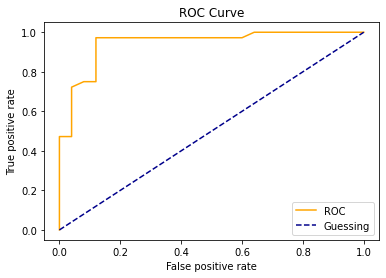

In [191]:
# Create a function for plotting roc curve
import matplotlib.pyplot as plt
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr,tpr,color = "orange", label = "ROC")
    plt.plot([0,1],[0,1],color = "darkblue",linestyle = "--", label = "Guessing")
    plt.xlabel("False positive rate")
    plt.ylabel("True positive rate")
    plt.title("ROC Curve")
    plt.legend()
    plt.show()

plot_roc_curve(fpr,tpr)

In [193]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_probs_positive)

0.9444444444444445

**Confusion Matrix**

In [194]:
from sklearn.metrics import confusion_matrix
y_preds = clf.predict(X_test)
confusion_matrix(y_test,y_preds)

array([[22,  3],
       [ 5, 31]])

In [195]:
# Vizulizing the confusion matrices with pd.crosstab
pd.crosstab(y_test,
            y_preds,
            rownames=["Actual labels"],
            colnames=["Predicted labels"])

Predicted labels,0,1
Actual labels,,
0,22,3
1,5,31


<AxesSubplot:>

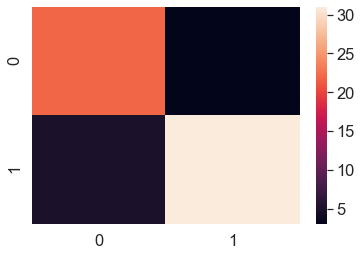

In [197]:
# Make pur confusion matrix more visual using Seaborn's heatmap
import seaborn as sns
sns.set(font_scale = 1.5)
conf_mat = confusion_matrix(y_test,y_preds)
sns.heatmap(conf_mat)

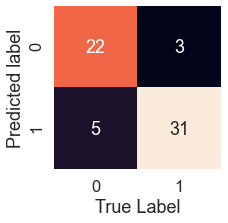

In [201]:
def plt_config_mat(conf_mat):
    fig, ax = plt.subplots(figsize = (3,3))
    ax = sns.heatmap(conf_mat,
                     annot=True,
                     cbar=False)
    plt.xlabel("True Label")
    plt.ylabel("Predicted label")
    
plt_config_mat(conf_mat)

**Classification Report**

In [202]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.81      0.88      0.85        25
           1       0.91      0.86      0.89        36

    accuracy                           0.87        61
   macro avg       0.86      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



# Regression model evulation matrices


**R^2**

In [205]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

X = boston_df.drop("target",axis = 1)
y = boston_df["target"]

X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.2)

model = RandomForestRegressor()
model.fit(X_train,y_train);

In [206]:
model.score(X_test,y_test)

0.8654448653350507

In [207]:
from sklearn.metrics import r2_score

y_test_mean = np.full(len(y_test),y_test.mean())

In [210]:
y_test.mean()

21.488235294117644

In [211]:
r2_score(y_test,y_test_mean)

0.0

In [212]:
r2_score(y_test,y_test)

1.0

**Mean Absolute Error**

In [214]:
from sklearn.metrics import mean_absolute_error

y_preds = model.predict(X_test)
mae = mean_absolute_error(y_test,y_preds)
mae

2.136382352941176

In [216]:
df = pd.DataFrame(data = {"actual vlaues": y_test,
                          "Predected values":y_preds})
df["Difference"] = df["Predected values"] - df["actual vlaues"]
df

,actual vlaues,Predected values,Difference
173,23.6,23.081,-0.519
274,32.4,30.574,-1.826
491,13.6,16.759,3.159
72,22.8,23.460,0.660
452,16.1,16.893,0.793
...,...,...,...
412,17.9,13.159,-4.741
436,9.6,12.476,2.876
411,17.2,13.612,-3.588
86,22.5,20.205,-2.295


**Mean Squared Error**

In [218]:
from sklearn.metrics import mean_squared_error
y_preds = model.predict(X_test)
mse = mean_squared_error(y_test,y_preds)
mse

9.867437068627442

**Finally using scoring parameter**

In [219]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
np.random.seed(42)
X = heart_disease.drop("target",axis = 1)
y = heart_disease["target"]
clf = RandomForestClassifier()

In [223]:
np.random.seed(42)
cv_acc = cross_val_score(clf, X, y, cv = 5, scoring = None)
cv_acc

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [224]:
# Cross validated accuracy 
print(f"Cross validated accuracy is :{np.mean(cv_acc)*100:.2f}%")

Cross validated accuracy is :82.48%


In [229]:
np.random.seed(42)
cv_acc = cross_val_score(clf, X, y, cv = 5, scoring = None)
print(f"Cross validated accuracy is :{np.mean(cv_acc)*100:.2f}%")

Cross validated accuracy is :82.48%


In [230]:
# Precision
cv_precision = cross_val_score(clf, X, y, cv = 5, scoring = "precision")
np.mean(cv_precision)

0.8085601538512754

In [231]:
# Recall
cv_recall = cross_val_score(clf, X, y, cv = 5, scoring = "recall")
np.mean(cv_recall)

0.8424242424242424

In [234]:
cv_f1 = cross_val_score(clf, X, y, cv = 5, scoring = "f1")
np.mean(cv_f1)

0.8455032904593217

In [236]:
# How about our regression model
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)
X = boston_df.drop("target",axis = 1)
y = boston_df["target"]

model = RandomForestRegressor()

In [238]:
np.random.seed(42)
cv_r2 = cross_val_score(model, X, y, cv = 5,scoring=None)
np.mean(cv_r2)

0.6243870737930857

In [240]:
np.random.seed(42)
cv_r2 = cross_val_score(model, X, y, cv = 5,scoring="r2")
np.mean(cv_r2)

0.6243870737930857

In [242]:
# Mean absolute error
np.random.seed(42)
cv_mae = cross_val_score(model, X, y, cv = 5,scoring="neg_mean_absolute_error")
cv_mae

array([-2.11419608, -2.58716832, -3.33976238, -3.78563366, -3.32941584])

In [246]:
#Mean Squared error
np.random.seed(42)
cv_mse = cross_val_score(model, X, y, cv = 5,scoring="neg_mean_squared_error")
np.mean(cv_mse)

-21.261442856882137

# Using different evulation matrix as sklearn functions
**Classification Evulation Function**

In [250]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

np.random.seed(42)

X = heart_disease.drop("target",axis = 1)
y = heart_disease["target"]

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)

clf = RandomForestClassifier()
clf.fit(X_train,y_train)

# Make some predictions
y_preds = clf.predict(X_test)

# Evulationg the classifier
print("Classifier matrices on the test set: ")
print(f"Accuracy: {accuracy_score(y_test,y_preds)*100:.2f}%")
print(f"precision: {precision_score(y_test,y_preds)}")
print(f"Recall: {recall_score(y_test,y_preds)}")
print(f"F1: {f1_score(y_test,y_preds)}")

Classifier matrices on the test set: 
Accuracy: 85.25%
precision: 0.8484848484848485
Recall: 0.875
F1: 0.8615384615384615


**Regression Evulation Functions**

In [254]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

np.random.seed(42)

X = boston_df.drop("target",axis = 1)
y = boston_df["target"]

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)

model = RandomForestRegressor()
model.fit(X_train,y_train)

# Make some predictions
y_preds = model.predict(X_test)

# Evulationg the Regression
print("Regression matrices on the test set: ")
print(f"R^2: {r2_score(y_test,y_preds)}")
print(f"MAE: {mean_absolute_error(y_test,y_preds)}")
print(f"MSE: {mean_squared_error(y_test,y_preds)}")

Regression matrices on the test set: 
R^2: 0.8654448653350507
MAE: 2.136382352941176
MSE: 9.867437068627442


# Improving our models

     Frist model = baseline model
     Frist predictions = baseline Prediction

In [258]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()

In [259]:
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

### Tuning HyperParameter By Hand

What We Are going to adjust

* `max_depth`
* `min_samples_leaf`
* `max_features`
* `min_samples_split`
* `n_estimators`

In [264]:
def evulate_preds(y_true,y_preds):
    """
    Performs evultion comparasion on y_true labels and y_preds labels on a classification
    """
    accuracy = accuracy_score(y_true,y_preds)
    precision = precision_score(y_true,y_preds)
    recall = recall_score(y_true,y_preds)
    f1 = f1_score(y_true,y_preds)
    metric_dict = {
        "accuracy": round(accuracy,2),
        "precision": round(precision,2),
        "recall": round(recall,2),
        "f1": round(f1,2)
    }
    print(f"Acc: {accuracy*100:.2f}%")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1: {f1:.2f}")
    
    return metric_dict
            

In [266]:
from sklearn.ensemble import RandomForestClassifier
np.random.seed(42)

#Shuffling the data 
heart_disease_shuffled = heart_disease.sample(frac=1)

# Split the data into X and y 
X = heart_disease_shuffled.drop("target",axis = 1)
y = heart_disease_shuffled["target"]

# Split the data into train , validation and test
train_split = round(0.7 * len(heart_disease_shuffled))
valid_split = round(train_split + 0.15 * len(heart_disease_shuffled))
X_train,y_train = X[:train_split], y[:train_split]
X_valid,y_valid = X[train_split:valid_split], y[train_split:valid_split]
X_test,y_test = x[valid_split:],y[valid_split:]

clf = RandomForestClassifier()
clf.fit(X_train,y_train)

# Making predictions on validation slpit
y_preds = clf.predict(X_valid)

# Evulating the classifier
baseline_metrices = evulate_preds(y_valid,y_preds)
baseline_metrices

Acc: 82.22%
Precision: 0.81
Recall: 0.88
F1: 0.85


{'accuracy': 0.82, 'precision': 0.81, 'recall': 0.88, 'f1': 0.85}